<a href="https://colab.research.google.com/github/dtphuong2612/Data_Preparing/blob/main/homework02_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [5]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

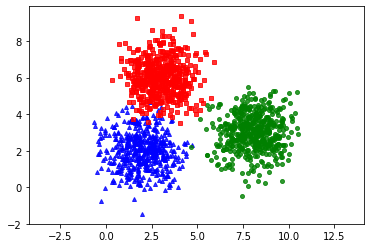

In [8]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [12]:
def pick_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def check(centers, new_centers):
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [13]:
def kmeans(X, K):
    centers = [pick_centers(X, K)]
    labels = []
    while True:
        labels.append(assign_labels(X, centers[-1]))
        new_centers = update_centers(X, labels[-1], K)
        if check(centers[-1], new_centers):
            break
        centers.append(new_centers)
    return (centers, labels)

[[8.03643517 3.02468432]
 [1.9780868  2.0065323 ]
 [2.98431534 6.03500824]]


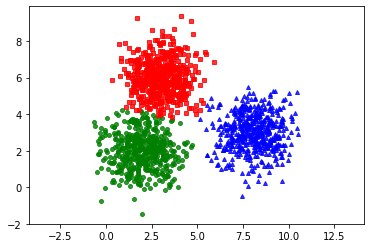

In [14]:
(centers, labels) = kmeans(X, K)
print(centers[-1])

kmeans_display(X, labels[-1])

[[8.03792017 3.03090413]
 [2.47945234 4.01363189]]


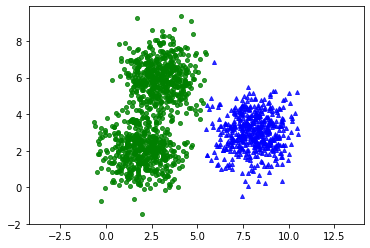

In [15]:
(centers, labels) = kmeans(X, 2)
print(centers[-1])

kmeans_display(X, labels[-1])